In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow import keras

# Read Data

In [11]:
train_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Osteoarthritis_Assignment_dataset\train'
test_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Osteoarthritis_Assignment_dataset\test'
validation_dir  = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Osteoarthritis_Assignment_dataset\Valid'

## Data Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range = 0.3,
    horizontal_flip=True,
    vertical_flip = True,
    rotation_range=40,
    zoom_range=0.3
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode = 'binary'
)

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
conv_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [8]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [9]:
from tensorflow.keras import layers,models

In [10]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [13]:
checkpoint = keras.callbacks.ModelCheckpoint('Oeteoarthritis.h5',save_best_only=True)

In [14]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch=235,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=64,
    callbacks=[checkpoint]
)

<ipython-input-14-ba6edfdb3941>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/30
235/235 [==============================] - 276s 1s/step - loss: 0.5785 - acc: 0.6949 - val_loss: 0.6173 - val_acc: 0.6828
Epoch 2/30
235/235 [==============================] - 237s 1s/step - loss: 0.4933 - acc: 0.7523 - val_loss: 0.4497 - val_acc: 0.7906
Epoch 3/30
235/235 [==============================] - 257s 1s/step - loss: 0.4670 - acc: 0.7715 - val_loss: 0.3033 - val_acc: 0.8672
Epoch 4/30
235/235 [==============================] - 246s 1s/step - loss: 0.4459 - acc: 0.7851 - val_loss: 0.3463 - val_acc: 0.8391
Epoch 5/30
235/235 [==============================] - 262s 1s/step - loss: 0.4055 - acc: 0.8055 - val_loss: 0.2569 - val_acc: 0.8922
Epoch 6/30
235/235 [==============================] - 248s 1s/step - loss: 0.3831 - acc: 0.8319 - val_loss: 0.1643 - val_acc: 0.9359
Epoch 7/30
235/235 [==============================] - 198s 843ms/step - loss: 0.3845 - acc: 0.8174 - val_loss: 0.1611 - val_acc: 0.9312
Epoch 8/30
235/235 [==============================] - 215s 916ms/s

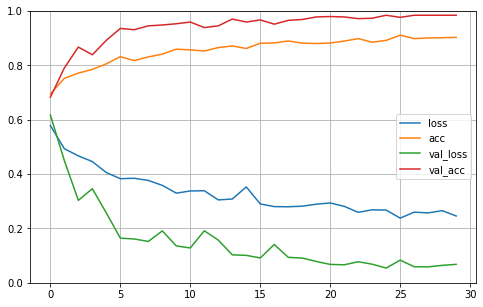

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    batch_size=30,
    class_mode='binary'
)

Found 844 images belonging to 2 classes.


In [15]:
model1 = keras.models.load_model('Oeteoarthritis.h5')

In [16]:
model1.evaluate(test_generator,steps=29)

29/29 [==============================] - 16s 488ms/step - loss: 47.7782 - acc: 0.3922


[47.77821731567383, 0.39218008518218994]

In [18]:
prob = model1.predict(test_generator,1)
print(prob)

29/29 [==============================] - 8s 279ms/step
[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99878585e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.92834091e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.27359282e-06]
 [9.99998927e-01]
 [1.00000000e+00]
 [8.43337715e-01]
 [9.99999702e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.40860400e-03]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99954641e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.20284724e-01]
 [1.00000000e+00]
 [1.03069078e-05]
 [9.99992669e-01]
 [2.95083341e-03]
 [9.28541243e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000

In [28]:
if probs<=0.5:
    out = "Diseased"
    proab = 100*(1-prob)
    remedy = "Apply Something"
    print(remedy, "at",probs)
else:
    out = "Healthy"
    proab = 100*prob
    remedy = " "
    print(remedy)

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Apply Something at [4.273593e-06]
 
 
 
 
 
 
Apply Something at [0.0044086]
 
 
 
 
 
 
 
 
 
 
Apply Something at [1.0306908e-05]
 
Apply Something at [0.00295083]
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Apply Something at [0.01909723]
 
 
 
 
 
Apply Something at [0.00053285]
 
 
Apply Something at [0.01926118]
 
 
 
 
 
 
 
 
 
 
Apply Something at [0.00035909]
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Apply Something at [0.00343126]
 
 
 
 
 
Apply Something at [0.00370083]
 
 
 
 
 
 
 
 
 
 
Apply Something at [0.25433388]
 
Apply Something at [0.01217068]
 
 
Apply Something at [1.33739695e-05]
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Apply Something at [0.01813671]
 
 
 
 
Apply Something at [0.04945403]
 
 
 
 
 
 
 
 
 
Apply Something at [0.36767858]
 
Apply Something at [0.00223058]
 
 
 
 
 
 
 
Apply Something at [0.0007092]
Apply Something at [0.40225238]
 
 
 
 
 
 
 
 
 
Apply Something at [0.00218998]
 
 
 
 
 
 
 
Apply S